<a href="https://www.kaggle.com/code/lakshmipriya190803/trafficsign-classifier-yolov8-inceptionv3-resnet?scriptVersionId=158729719" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Welcome :)

In this notebook I'm going to go through basics of Computer Vision needed for classification of images datset. This dataset requires multi-class classification, and there's a severe class imbalance, we will be tackling all of this in the upcoming sections.

In order to tackle the classification problem I'm going to use a technique called transfer learning,where knowledge gained from solving one problem is applied to a different but related problem. In the context of computer vision, it involves using pre-trained models, typically trained on large-scale datasets like ImageNet, as a starting point for solving new vision tasks.

Why transfer learning?

1. Reduced Training Time
2. Improved Performance
3. Effective Feature Extraction

Therefore I will be exploring the following models:



## 🚀YOLOv8 
YOLOv8 is a new state-of-the-art computer vision model built by Ultralytics, the creators of YOLOv5. The YOLOv8 model contains out-of-the-box support for object detection, classification, and segmentation tasks,and trains a model using the COCO dataset for 100 epochs. It includes simple functionality for Test Time Augmentation (TTA), model ensembling, hyperparameter evolution, and export to ONNX, CoreML and TFLite. They can be trained on large datasets and run on diverse hardware platforms, from CPUs to GPUs. YOLOv8 detection models have no suffix and are the default YOLOv8 models, i.e. yolov8n.pt 

## 🚀InceptionV3
YOLOv5 🚀 is a family of compound-scaled object detection models trained on the COCO dataset, and includes simple functionality for Test Time Augmentation (TTA), model ensembling, hyperparameter evolution, and export to ONNX, CoreML and TFLite.

## 🚀ResNet
YOLOv5 🚀 is a family of compound-scaled object detection models trained on the COCO dataset, and includes simple functionality for Test Time Augmentation (TTA), model ensembling, hyperparameter evolution, and export to ONNX, CoreML and TFLite.

## 💡Inspiration:
I recently started to driving and in order to assist me in understanding the traffic rules and signs, I'm planning to create an app which built on top of this, in order to recognise and give a description of the sign I see on the road.  

## ❗Author's Note:

Make sure to run the cells from top to bottom with a GPU accelerator. There are some linux commands present in some cells so this is important to take into account. Also, any suggestions, comments and recommendations to improve the notebook will be highly appreciated. Cheers!

In [1]:
import pandas as pd
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import pickle

In [2]:
#viewing the images in the training set

#loading pickled data 
#pickle is used for serializing and de-serializing a Python object structure. 
train_path = '/kaggle/input/german-traffic-sign-dataset/train.p'
test_path = '/kaggle/input/german-traffic-sign-dataset/test.p'
valid_path = '/kaggle/input/german-traffic-sign-dataset/valid.p'

label_path = '/kaggle/input/german-traffic-sign-dataset/signname.csv'


with open(train_path, mode = 'rb') as f:
    train = pickle.load(f)
    
with open(test_path, mode = 'rb') as f:
    test = pickle.load(f)
    
with open(valid_path, mode = 'rb') as f:
    valid = pickle.load(f)
    
sign_names = pd.read_csv(label_path)

In [3]:
type(test) , type(train) , type(valid)

(dict, dict, dict)

In [4]:
#getting column names for further processing
train_cols = list(train.keys())
test_cols = list(test.keys())
valid_cols = list(valid.keys())

print(f"Training colums : {train_cols}")
print(f"Testing columns : {test_cols}")
print(f"Validation columns : {valid_cols}")

Training colums : ['coords', 'labels', 'features', 'sizes']
Testing columns : ['sizes', 'coords', 'features', 'labels']
Validation columns : ['coords', 'labels', 'features', 'sizes']


In [5]:
#splitting the data into train, test and valid sets

X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']
X_valid, y_valid = valid['features'], valid['labels']
classes = np.unique(y_train)

print(f"Dimensions of one image : {X_train.shape[1:]}")
print(f"Number of training samples : {X_train.shape[0]}")
print(f"Number of testing samples : {X_test.shape[0]}")
print(f"Number of validation samples : {X_valid.shape[0]}")
print(f"Number of classes : {len(classes)}")
print(f"Does it contain null values? {np.unique(np.isnan(y_train))}")

Dimensions of one image : (32, 32, 3)
Number of training samples : 34799
Number of testing samples : 12630
Number of validation samples : 4410
Number of classes : 43
Does it contain null values? [False]


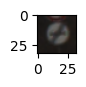

In [6]:
plt.figure(figsize=(0.5,0.5))
plt.imshow(X_train[1])
plt.show()

In [7]:
print(sign_names.head(5))
sign_names['SignName'][0]

   ClassId              SignName
0        0  Speed limit (20km/h)
1        1  Speed limit (30km/h)
2        2  Speed limit (50km/h)
3        3  Speed limit (60km/h)
4        4  Speed limit (70km/h)


'Speed limit (20km/h)'

Class 0 : Speed limit (20km/h)


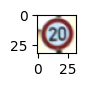

Class 1 : Speed limit (30km/h)


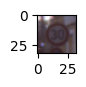

Class 2 : Speed limit (50km/h)


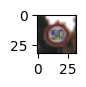

Class 3 : Speed limit (60km/h)


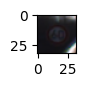

Class 4 : Speed limit (70km/h)


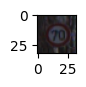

Class 5 : Speed limit (80km/h)


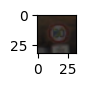

Class 6 : End of speed limit (80km/h)


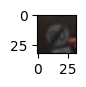

Class 7 : Speed limit (100km/h)


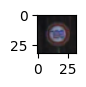

Class 8 : Speed limit (120km/h)


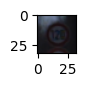

Class 9 : No passing


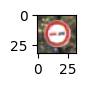

Class 10 : No passing for vehicles over 3.5 metric tons


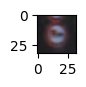

Class 11 : Right-of-way at the next intersection


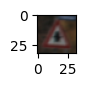

Class 12 : Priority road


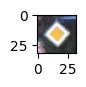

Class 13 : Yield


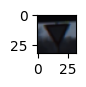

Class 14 : Stop


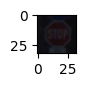

Class 15 : No vehicles


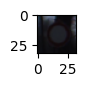

Class 16 : Vehicles over 3.5 metric tons prohibited


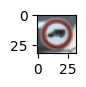

Class 17 : No entry


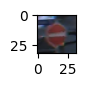

Class 18 : General caution


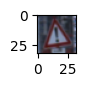

Class 19 : Dangerous curve to the left


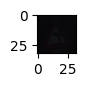

Class 20 : Dangerous curve to the right


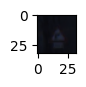

Class 21 : Double curve


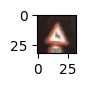

Class 22 : Bumpy road


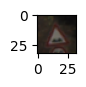

Class 23 : Slippery road


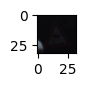

Class 24 : Road narrows on the right


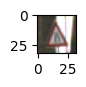

Class 25 : Road work


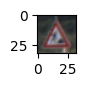

Class 26 : Traffic signals


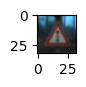

Class 27 : Pedestrians


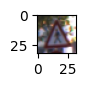

Class 28 : Children crossing


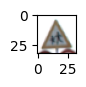

Class 29 : Bicycles crossing


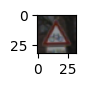

Class 30 : Beware of ice/snow


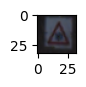

Class 31 : Wild animals crossing


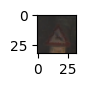

Class 32 : End of all speed and passing limits


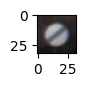

Class 33 : Turn right ahead


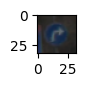

Class 34 : Turn left ahead


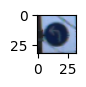

Class 35 : Ahead only


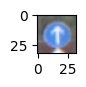

Class 36 : Go straight or right


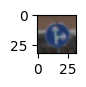

Class 37 : Go straight or left


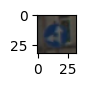

Class 38 : Keep right


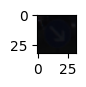

Class 39 : Keep left


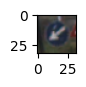

Class 40 : Roundabout mandatory


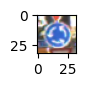

Class 41 : End of no passing


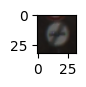

Class 42 : End of no passing by vehicles over 3.5 metric


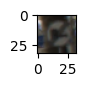

In [8]:
#displaying sample image of each label
classes, class_start_index, class_total_count = np.unique(y_train, return_index = True, return_counts = True) 
for clas in classes:
    print(f"Class {clas} : {sign_names['SignName'][clas]}")
    plt.figure(figsize=(0.5,0.5))
    id = class_start_index[clas] + 5
    plt.imshow(X_train[id])
    plt.show()

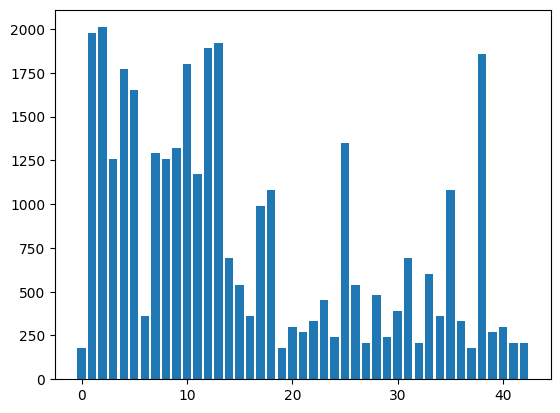

In [9]:
#class distribution of data of training dataset : 

plt.bar(classes, class_total_count)
plt.show()

In [10]:
print(min(class_total_count))

180
